## Data 607 -- Statistical and Machine Learning -- Winter 2020
### Assignment 1 - Michael Ellsworth, UCID: 30101253

#### Instructions

- Present your solutions in a single Jupyter notebook `.ipynb` file.

- Call the file 
<p style="text-align: center;font-family: monospace">[your last name]_[your first name]_[student number]_a1.ipynb.</p>
Do not include the `[` and `]` in the file name.

- Upload the file to the appropriate dropbox on the D2L site before 23:59 on Wednesday, March 4.

- You may consult with your classmates, but you must submit your own work.


#### Exercise 1

Edgar Anderson's <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris dataset</a> was made famous by <a href="https://en.wikipedia.org/wiki/Ronald_Fisher">Sir Roland Fisher</a>'s analysis in his famous 1936 paper, "<a href="https://digital.library.adelaide.edu.au/dspace/handle/2440/15227">The use of multiple measurements in taxonomic problems</a>". The dataset consists of measurements of physical characteristics -- *sepal length*, *sepal width*, *petal length*, and *petal width* -- of various species of the iris flower -- *Iris setosa*, *Iris virginica* and *Iris versicolor* -- collected with an eye to quantifying morphological variation. Nowadays, analysis of the Iris dataset is a staple of statistical pedagogy.

In this exercise, we will use Bayes Theorem and the iris dataset to train a classifier.

Due to its prominence, the iris dataset is included with `scikit-learn`. Load it as follows:

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Although the iris dataset includes four features, we'll only use two for our Bayes classifier: petal length (feature 2) and petal width (feature 3), numbered from 0.

In [2]:
X = data.data[:, 2:]
y = data.target

print(X.shape, y.shape)

(150, 2) (150,)


Split the data set into a training set of size 120 and a testing set of size 30.

In [3]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

Compute the relative proportions of the three species of iris in the training set. Store them in a vector `p_y`. In the Bayesian parlance, these proportions represent *prior probabilities* of the three species.

In [4]:
# Assignment code
import numpy as np
p_y = np.array([sum(y_tr == 0), sum(y_tr == 1), sum(y_tr ==2)])/len(y_tr)

Separate `X_tr` into three subsets according to species.

In [5]:
X_tr_y = [X_tr[y_tr == k, :] for k in [0, 1, 2]]

Fit a 2-dimensional Gaussian distribution to each of these subsets.

In [6]:
import numpy as np

means = [np.mean(x, axis = 0) for x in X_tr_y]
covs = [np.cov(x.T) for x in X_tr_y]

Make contour plots of the densities for each of the three species.

Make a contour plot the associated *mixture density*. (Do *not* use `GaussianMixture` from `sklearn.mixture`. That's for situations in which you *don't know the class labels*. Just take an appropriate weighted sum of the densities whose contours you just plotted above.)

> See `height-weight.ipynb` from the Session 01 for an example in the two-class case.

In [7]:
from scipy.stats import multivariate_normal as mvn
from matplotlib import pyplot as plt

lmin, wmin = np.min(X, axis=0)
lmax, wmax = np.max(X, axis=0)
ls = np.linspace(lmin, lmax, 100)
ws = np.linspace(wmin, wmax, 100)
L, W = np.meshgrid(ls, ws)
LW = np.stack((L, W), axis=-1)

pdf_0 = mvn.pdf(LW, mean=means[0], cov=covs[0])
pdf_1 = mvn.pdf(LW, mean=means[1], cov=covs[1])
pdf_2 = mvn.pdf(LW, mean=means[2], cov=covs[2])
pdf = p_y[0]*pdf_0 + p_y[1]*pdf_1 + p_y[2]*pdf_2

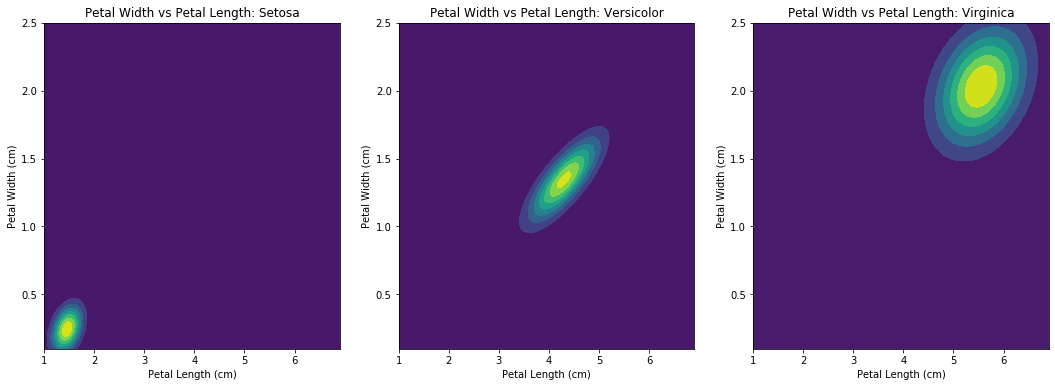

In [8]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.contourf(L, W, pdf_0)
plt.title('Petal Width vs Petal Length: Setosa')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.subplot(1, 3, 2)
plt.contourf(L, W, pdf_1)
plt.title('Petal Width vs Petal Length: Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.subplot(1, 3, 3)
plt.contourf(L, W, pdf_2)
plt.title('Petal Width vs Petal Length: Virginica')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()

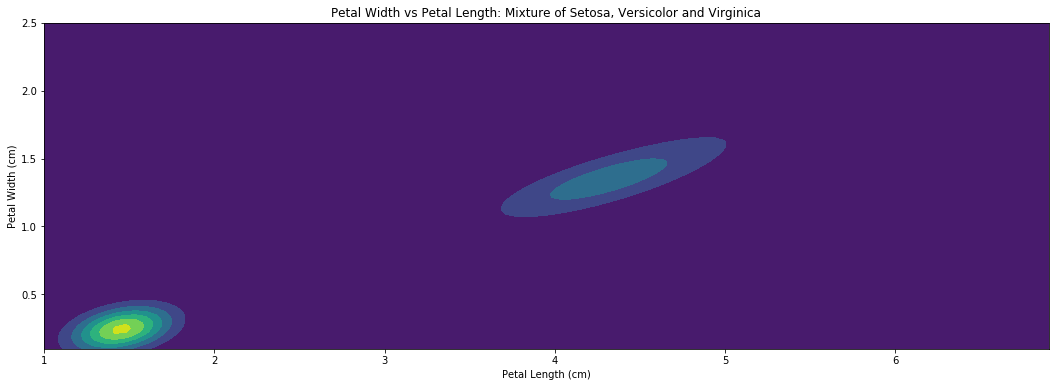

In [9]:
plt.figure(figsize=(18, 6))
plt.contourf(L, W, pdf)
plt.title('Petal Width vs Petal Length: Mixture of Setosa, Versicolor and Virginica')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()

For each sample $x$ in the *test set*, compute the likelihoods
$$p(x|y=0),\quad p(x|y=1),\quad \text{and} \quad p(x|y=2)\tag{$\star$}$$
using the above class-conditional Gaussian distributions fit to the training data.
Store these in a matrix `p_x_y` of shape `(30, 3)` whose `i`-th row contains of the likelihoods of `X_te[i]` as in $(\star)$.

Predict class labels for the testing set by choosing those with the highest posterior probability.

Compare your predicted class labels with `y_te`. How accurate are your predictions?

> See `height-weight.ipynb` from the Session 01 for an example in the two-class case.

In [10]:
pdf_0_te = mvn.pdf(X_te, mean=means[0], cov=covs[0])
pdf_1_te = mvn.pdf(X_te, mean=means[1], cov=covs[1])
pdf_2_te = mvn.pdf(X_te, mean=means[2], cov=covs[2])
pdf_te = pdf_0_te * p_y[0] + pdf_1_te * p_y[1] + pdf_2_te * p_y[2]

p_0_x = pdf_0_te * p_y[0] / pdf_te
p_1_x = pdf_1_te * p_y[1] / pdf_te
p_2_x = pdf_2_te * p_y[2] / pdf_te

p_x_y = np.column_stack((p_0_x, p_1_x, p_2_x))

print(sum(np.argmax(p_x_y, axis=1) == y_te)/len(y_te))

0.9666666666666667


#### Exercise 2

Another data set included with `scikit-learn` is the
<a href="https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset">diabetes dataset</a>.
It contains measurements of ten features for each of 442 diabetes patients as well as a quantitative measurement of disease progression after one year. The goal is to predict each patient's progression in terms of their ten baseline feature measurements.

1. Using `LinearRegression` from `sklearn.linear_model`, train a linear regression model on a training subset of the data. Report the mean squared error on the corresponding testing data.

2. Now use 10-fold cross-validation with mean squared to estimate the prediction error of a linear regression model for the diabetes data set, as above.

2. Now perform the regression using `KNeighborsRegressor` from `sklearn.neighbors`. Use 10-fold cross-validation with mean squared error to choose an optimal value of $k$. 

3. `KNeighborsRegressor` accepts a parameter called `weights`
(see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">the docs</a>).
Setting `weights="distance"`, the regressor will weight the neighbor response values by the inverse of their distance from the point, $x$, of interest, giving neighbors closer to $x$ more influence than those farther away.
The default is `weights="uniform"`, weighting each neighbor equally.
Use 10-fold cross-validation with mean squared error to find an optimal choice of the pair `(n_neighbors, weights)`.

4. Compare the estimates of prediction error from 1, 2, 3, and 4.

In [11]:
from sklearn.datasets import load_diabetes

X2, y2 = load_diabetes(return_X_y = True)

In [12]:
from sklearn.model_selection import train_test_split

X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y2, test_size=0.2)

In [13]:
# 1. Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

M2 = LinearRegression()
M2.fit(X2_tr, y2_tr)
y2_pred = M2.predict(X2_te)
error1 = mean_squared_error(y2_te, y2_pred)
print(f"1. Mean squared error: {error1:.6}")

1. Mean squared error: 3011.88


In [14]:
# 2. 10-fold cross-validation
from sklearn.model_selection import cross_val_score

error2 = np.mean(-cross_val_score(M2, X2, y2, cv=10, scoring="neg_mean_squared_error"))
print(f"2. 10-fold cross validation score using mean squared error = {error2}")

2. 10-fold cross validation score using mean squared error = 3000.381032839052


3. The optimal value of k using 10 fold cross validation is k = 19 with a MSE of 3238.92


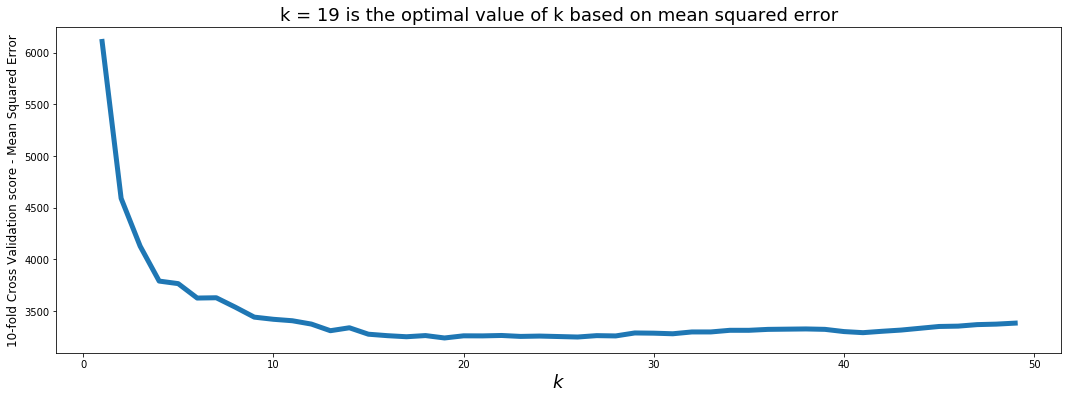

In [15]:
#3. KNeighborsRegressor with 10-fold cross-validation
from sklearn.neighbors import KNeighborsRegressor

scores = []
for k in range(1, 50):
    M3 = KNeighborsRegressor(n_neighbors=k)
    score = np.mean(-cross_val_score(M3, X2, y2, cv=10, scoring="neg_mean_squared_error"))
    scores.append(score)

plt.figure(figsize=(18,6))
plt.plot(range(1, 50), scores, lw=5)
plt.xlabel("$k$", fontsize=18)
plt.ylabel("10-fold Cross Validation score - Mean Squared Error", fontsize=12)
plt.title("k = 19 is the optimal value of k based on mean squared error", fontsize = 18)

optimal_k3 = np.argmin(scores) + 1
error3 = scores[optimal_k3 - 1]
print(f"3. The optimal value of k using 10 fold cross validation is k = {optimal_k3} with a MSE of {error3:.6}")

4. The optimal value of k using 10 fold cross validation and weighting points by distance is k = 26 with a MSE of 3235.52


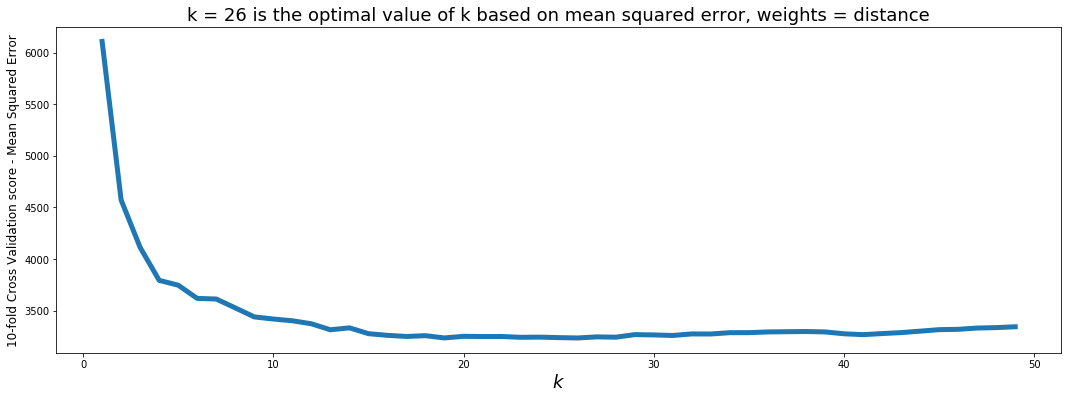

In [16]:
#4. KNeighborsRegressor with 10-fold cross-validation, weights = distance
from sklearn.neighbors import KNeighborsRegressor

scores = []
for k in range(1, 50):
    M4 = KNeighborsRegressor(n_neighbors=k, weights = "distance")
    score = np.mean(-cross_val_score(M4, X2, y2, cv=10, scoring="neg_mean_squared_error"))
    scores.append(score)

plt.figure(figsize=(18,6))
plt.plot(range(1, 50), scores, lw=5)
plt.xlabel("$k$", fontsize=18)
plt.ylabel("10-fold Cross Validation score - Mean Squared Error", fontsize=12)
plt.title("k = 26 is the optimal value of k based on mean squared error, weights = distance", fontsize = 18)

optimal_k4 = np.argmin(scores) + 1
error4 = scores[optimal_k4 - 1]
print(f"4. The optimal value of k using 10 fold cross validation and weighting points by distance is k = {optimal_k4} with a MSE of {error4:.6}")


In [17]:
print(f"1. MSE of linear regression = {round(error1, 2)}")
print(f"2. MSE of linear regression with 10 fold cross validation = {round(error2, 2)}")
print(f"3. MSE of neighbours regression with k = 19 and 10 fold cross validation = {round(error3, 2)}")
print(f"4. MSE of neighbours regression with k = 26 and 10 fold cross validation with distance weights = {round(error4, 2)}")

print("MSE of linear regression with 10 fold cross validation has the lowest mean squared error")

1. MSE of linear regression = 3011.88
2. MSE of linear regression with 10 fold cross validation = 3000.38
3. MSE of neighbours regression with k = 19 and 10 fold cross validation = 3238.92
4. MSE of neighbours regression with k = 26 and 10 fold cross validation with distance weights = 3235.52
MSE of linear regression with 10 fold cross validation has the lowest mean squared error
